# JTV Analytical Assessment
Zach Policky

######  GROSS_PRODUCT_SALES - The total gross product sales generated that hour
######  NUMBER_ORDERS - The total number of orders generated that hour
######  SAS_V2 - an airtime weighting metric, this is a continuous variable that helps capture the 
######              seasonality curve that exists intraday as it relates to airtime.  There is varying
######              amounts of viewers through the day (10pm - high, 4am - low).  This metrics is simply
######              a prooxy for airtime weighting and may be useful in forecasting sales.
######  PRIMETIME - an airtime metric that is binary: 1 = primetime airtime slot, 0 = non-primetime slot
######  BLACK_FRIDAY_LIFT - an airtime metric that is binary: 1 = black friday period, 0 = non-black friday
######  HOLIDAY_LIFT - an airtime metric that is binary: 1 = holiday period, 0 = non-holiday period
######  OTHER_HOLIDAY - an airtime metric that is binary: 1 = tertiary holiday indicator (ex. Valentine's day), 0 = non-tertiary holiday
######  ITEM_MARKUP - a financial metric that represents the percentage of item markup for items sold that hour
######  DISCOUNT_RATE - a financial metric that represents the percentage product discount for items sold that hour
######  SOLD_UNIT_PP - a financial metric that represents the aggregated sold unit price point for items that hour
######  FREE_SHIPPING - a financial binary metric that represents if free shipping was turned on that hour: 1 = free shipping, 0 = no free shipping
######  SHOW_HOST - an airtime metric that shows the show host for that hour
######  SHOW_CLASS - an airtime metric that shows the classification of show for that hour
######  DEPT - an airtime metric that shows the majority shown merchant department for that hour
######  IS_TAPED_SHOW - an airtime binary metric that indicated a taped show: 1 = taped show, 0 = live show


In [2]:
## Variables
#   GROSS_PRODUCT_SALES - The total gross product sales generated that hour
#   NUMBER_ORDERS - The total number of orders generated that hour
#   SAS_V2 - an airtime weighting metric, this is a continuous variable that helps capture the 
#              seasonality curve that exists intraday as it relates to airtime.  There is varying
#              amounts of viewers through the day (10pm - high, 4am - low).  This metrics is simply
#              a prooxy for airtime weighting and may be useful in forecasting sales.
#     PRIMETIME - an airtime metric that is binary: 1 = primetime airtime slot, 0 = non-primetime slot
#     BLACK_FRIDAY_LIFT - an airtime metric that is binary: 1 = black friday period, 0 = non-black friday
#     HOLIDAY_LIFT - an airtime metric that is binary: 1 = holiday period, 0 = non-holiday period
#     OTHER_HOLIDAY - an airtime metric that is binary: 1 = tertiary holiday indicator (ex. Valentine's day), 0 = non-tertiary holiday
#     ITEM_MARKUP - a financial metric that represents the percentage of item markup for items sold that hour
#     DISCOUNT_RATE - a financial metric that represents the percentage product discount for items sold that hour
#     SOLD_UNIT_PP - a financial metric that represents the aggregated sold unit price point for items that hour
#     FREE_SHIPPING - a financial binary metric that represents if free shipping was turned on that hour: 1 = free shipping, 0 = no free shipping
#     SHOW_HOST - an airtime metric that shows the show host for that hour
#     SHOW_CLASS - an airtime metric that shows the classification of show for that hour
#     DEPT - an airtime metric that shows the majority shown merchant department for that hour
#     IS_TAPED_SHOW - an airtime binary metric that indicated a taped show: 1 = taped show, 0 = live show


### 1) What are the key drivers of gross product sales?


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#data = pd.read_csv('J:/AAEcon/jtv_assessment/analytical_assessment_dataset.csv')
data = pd.read_csv('C:/Users/zachp/Dropbox/AAEcon/jtv_assessment/analytical_assessment_dataset.csv')

In [4]:
data.head()
df = pd.DataFrame(data)
df.head()

,order_date_hour,gross_product_sales,number_orders,sas_v2,primetime,black_friday_lift,holiday_lift,other_holiday,item_markup,discount_rate,sold_unit_pp,free_shipping,show_host,show_class,dept,is_taped_show
0,11/14/2016 0:00,52927,788,11473,1,NONE,NONE,NONE,0.6218,0.1885,56.96,1,MANDY,GENERIC,CS,N
1,11/14/2016 1:00,46694,576,8072,0,NONE,NONE,NONE,0.6143,0.2868,81.58,1,MANDY,GENERIC,CS,N
2,11/14/2016 2:00,28821,553,5576,0,NONE,NONE,NONE,0.6498,0.2917,44.11,1,TOMMY,GENERIC,GEMSTONES,Y
3,11/14/2016 3:00,28206,339,4413,0,NONE,NONE,NONE,0.7553,0.1272,66.08,1,TOMMY,GENERIC,GEMSTONES,Y
4,11/14/2016 4:00,14600,290,3415,0,NONE,NONE,NONE,0.7297,0.1620,43.44,1,MORGAN,GENERIC,BELLA_LUCE,N


In [5]:
#The variables black_friday_lift, holiday_lift, other_holiday, and is_taped_show need to be transformed into binary variables.

df['black_friday_lift'] = np.where(df['black_friday_lift'] == "NONE", '0', '1')
df['holiday_lift'] = np.where(df['holiday_lift'] == "NONE", '0','1')
df['other_holiday'] = np.where(df['other_holiday'] == "NONE", '0','1')
df['is_taped_show'] = np.where(df['is_taped_show'] == "N", '0','1')

In [6]:
#since there is a variable for seasonality, the order_date_hour variable is not important. So I will remove it from the dataset
df = df[[ 'gross_product_sales', 'number_orders', 'sas_v2',
       'primetime', 'black_friday_lift', 'holiday_lift', 'other_holiday',
       'item_markup', 'discount_rate', 'sold_unit_pp', 'free_shipping',
       'show_host', 'show_class', 'dept', 'is_taped_show']]

In [7]:
df.show_host.unique()

array(['MANDY', 'TOMMY', 'MORGAN', 'MEG', 'KRISTEN', 'KIM', 'HEIDI',
       'SCOTT', 'JENNIFER', 'MISTY', 'NIKKI', 'DAWN', 'SHARON', 'ROBERT',
       'WENDY', 'NIKKI S', 'REBECCA', 'SHEREE', 'MARK', 'MICHELLE',
       'JANA', 'CHERYL', 'MELISSA'], dtype=object)

In [8]:
df.head()

,gross_product_sales,number_orders,sas_v2,primetime,black_friday_lift,holiday_lift,other_holiday,item_markup,discount_rate,sold_unit_pp,free_shipping,show_host,show_class,dept,is_taped_show
0,52927,788,11473,1,0,0,0,0.6218,0.1885,56.96,1,MANDY,GENERIC,CS,0
1,46694,576,8072,0,0,0,0,0.6143,0.2868,81.58,1,MANDY,GENERIC,CS,0
2,28821,553,5576,0,0,0,0,0.6498,0.2917,44.11,1,TOMMY,GENERIC,GEMSTONES,1
3,28206,339,4413,0,0,0,0,0.7553,0.1272,66.08,1,TOMMY,GENERIC,GEMSTONES,1
4,14600,290,3415,0,0,0,0,0.7297,0.1620,43.44,1,MORGAN,GENERIC,BELLA_LUCE,0


In [9]:
df.show_class.unique()

array(['GENERIC', 'SALE', 'CLEARANCE'], dtype=object)

In [10]:
df.dept.unique()

array(['CS', 'GEMSTONES', 'BELLA_LUCE', 'CS_SOUTHWEST', 'JEWELRY MAKING',
       'GEM GIFTS', 'ARTISAN_INDIA', 'DIAMOND SYNTHETIC', 'CP_TIMNA',
       'CG_RUBY', 'CG', 'GOLD', 'CP', 'DS', 'DG', 'BELLA_ESOTICA',
       'MORNING_MIX', 'GFF', 'KITS', 'GOLD_MODA', 'PEARLS',
       'ARTISAN_ISRAEL', 'COSTUME_OFF_PARK', 'COSTUME_JEWELRY',
       'ARTISAN_BALI', 'SYNTHETICS', 'CP_MODA', 'GOLD_SPLENDIDO',
       'SILVER', 'PRESIDENT COLLECTION', 'BELLA_VANNA_K', 'CP_TEHYA',
       'BELLA_DILLENIUM', 'BELLA LUCE DESIGNERS', nan, 'COSTUME_WATERMAN',
       'BELLA_REMY', 'COLOR SILVER BRANDS', 'BELLA_CHARLES_WINSTON',
       'BELLA_JOSE_HESS', 'TOOLS AND SUPPLIES', 'COSTUME_TITANIC',
       'DS_PARK_AVE', 'ARTISAN_COLOMBIA', 'CS_PACIFIC_STYLE',
       'COSTUME_LOUIS', 'BELLA_TYCOON', 'CS_AZTEC', 'ROCKAFELLAS',
       'GFF_AFTER', 'DG_PARK_AVE', 'WATCHES', 'PER_STYLE'], dtype=object)

In [11]:
#These 3 variables (show_class, dept, show_host) need to be made into variables in order to find which are the drivers of sales
df2 = pd.get_dummies(df[['show_class', 'dept', 'show_host']])
#then i need to merge the new variables with the old variables
df2['gross_product_sales'] = df['gross_product_sales']
df3 = pd.merge(df, df2)

In [12]:
df3 = df3.drop(['show_class', 'dept', 'show_host'], axis = 1)

In [13]:
df3.columns

Index(['gross_product_sales', 'number_orders', 'sas_v2', 'primetime',
       'black_friday_lift', 'holiday_lift', 'other_holiday', 'item_markup',
       'discount_rate', 'sold_unit_pp', 'free_shipping', 'is_taped_show',
       'show_class_CLEARANCE', 'show_class_GENERIC', 'show_class_SALE',
       'dept_ARTISAN_BALI', 'dept_ARTISAN_COLOMBIA', 'dept_ARTISAN_INDIA',
       'dept_ARTISAN_ISRAEL', 'dept_BELLA LUCE DESIGNERS',
       'dept_BELLA_CHARLES_WINSTON', 'dept_BELLA_DILLENIUM',
       'dept_BELLA_ESOTICA', 'dept_BELLA_JOSE_HESS', 'dept_BELLA_LUCE',
       'dept_BELLA_REMY', 'dept_BELLA_TYCOON', 'dept_BELLA_VANNA_K', 'dept_CG',
       'dept_CG_RUBY', 'dept_COLOR SILVER BRANDS', 'dept_COSTUME_JEWELRY',
       'dept_COSTUME_LOUIS', 'dept_COSTUME_OFF_PARK', 'dept_COSTUME_TITANIC',
       'dept_COSTUME_WATERMAN', 'dept_CP', 'dept_CP_MODA', 'dept_CP_TEHYA',
       'dept_CP_TIMNA', 'dept_CS', 'dept_CS_AZTEC', 'dept_CS_PACIFIC_STYLE',
       'dept_CS_SOUTHWEST', 'dept_DG', 'dept_DG_PARK_AV

In [14]:
#Lets check the shape to make sure a regression is still possible. Since there are more rows than columns in our data matrix,
#we can do regression analysis. 
df3.shape

(9337, 90)

In [15]:
#Now lets find the correlation be
corr = df3.corr().abs()
corr_map = corr.sort_values('gross_product_sales', kind = 'quicksort', ascending = False)
corr_map.head(10)

,gross_product_sales,number_orders,sas_v2,primetime,item_markup,discount_rate,sold_unit_pp,free_shipping,show_class_CLEARANCE,show_class_GENERIC,...,show_host_MORGAN,show_host_NIKKI,show_host_NIKKI S,show_host_REBECCA,show_host_ROBERT,show_host_SCOTT,show_host_SHARON,show_host_SHEREE,show_host_TOMMY,show_host_WENDY
gross_product_sales,1.000000,0.721872,0.865777,0.667834,0.150714,0.043668,0.407558,0.057860,0.027754,0.030761,...,0.240079,0.388362,0.242007,0.197692,0.081419,0.044589,0.010590,0.073231,0.010686,0.101017
sas_v2,0.865777,0.752389,1.000000,0.728729,0.112954,0.114450,0.220543,0.018584,0.004905,0.005803,...,0.287129,0.322288,0.273198,0.228542,0.100479,0.076340,0.048535,0.064921,0.035509,0.105879
number_orders,0.721872,1.000000,0.752389,0.582330,0.043386,0.105265,0.228838,0.043119,0.107785,0.098613,...,0.210138,0.268749,0.210886,0.197486,0.064807,0.015733,0.011122,0.019135,0.035627,0.052765
primetime,0.667834,0.582330,0.728729,1.000000,0.013213,0.006843,0.156355,0.024684,0.005216,0.009101,...,0.147245,0.384697,0.145059,0.125524,0.032434,0.065813,0.088314,0.088674,0.033288,0.004758
sold_unit_pp,0.407558,0.228838,0.220543,0.156355,0.297132,0.221430,1.000000,0.019443,0.081779,0.070902,...,0.080116,0.145346,0.080234,0.027564,0.039816,0.032840,0.005407,0.071263,0.070761,0.074937
show_host_NIKKI,0.388362,0.268749,0.322288,0.384697,0.029485,0.022178,0.145346,0.029622,0.054833,0.055240,...,0.066731,1.000000,0.066243,0.074546,0.072976,0.051781,0.070143,0.043194,0.054724,0.072295
show_host_MISTY,0.315815,0.272821,0.279915,0.267413,0.022579,0.023442,0.093151,0.005323,0.060129,0.065856,...,0.069388,0.095446,0.068881,0.077514,0.075881,0.053843,0.072935,0.044914,0.056903,0.075173
dept_CS,0.256221,0.149704,0.265478,0.140476,0.171698,0.331939,0.182257,0.039466,0.029185,0.025378,...,0.139649,0.068734,0.111975,0.047999,0.056388,0.119895,0.052542,0.002693,0.005906,0.048369
show_host_NIKKI S,0.242007,0.210886,0.273198,0.145059,0.043062,0.033655,0.080234,0.030955,0.014153,0.012004,...,0.048158,0.066243,1.000000,0.053798,0.052665,0.037369,0.050620,0.031172,0.039493,0.052173
show_host_MORGAN,0.240079,0.210138,0.287129,0.147245,0.068759,0.092625,0.080116,0.003566,0.045118,0.048569,...,1.000000,0.066731,0.048158,0.054194,0.053052,0.037644,0.050992,0.031401,0.039784,0.052557


## The correlation map above shows the top 10 factors correlated with gross product sales

### 2) Are there any transformations of variables that we should account for?

The variables of black_friday_lift, holiday_lift, other_holiday, show_host, show_class, and dept all need to be transformed into dummy variables. This is possible because there are significantly more observations than variables after creating dummies. All the binary variables need to be changed to have numerical values instead of Yes/No. 

### 3) Do we need to take into account any outliers in the data?

In [16]:
q_df = df3.quantile([.25, .75])
q_df.loc['iqr'] = q_df.loc[0.75] - q_df.loc[0.25]
q_df.loc['whisker_length'] = 1.5 * q_df.loc['iqr']
q_df.loc['max_whisker'] = q_df.loc['whisker_length'] + q_df.loc[0.75]
q_df.loc['min_whisker'] = q_df.loc[0.25] - q_df.loc['whisker_length']
q_df

,gross_product_sales,number_orders,sas_v2,primetime,item_markup,discount_rate,sold_unit_pp,free_shipping,show_class_CLEARANCE,show_class_GENERIC,...,show_host_MORGAN,show_host_NIKKI,show_host_NIKKI S,show_host_REBECCA,show_host_ROBERT,show_host_SCOTT,show_host_SHARON,show_host_SHEREE,show_host_TOMMY,show_host_WENDY
0.25,34798.0,517.0,5926.0,0.0,0.61720,0.22380,48.32,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.75,93704.0,1278.0,12916.0,1.0,0.73070,0.33470,76.00,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iqr,58906.0,761.0,6990.0,1.0,0.11350,0.11090,27.68,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
whisker_length,88359.0,1141.5,10485.0,1.5,0.17025,0.16635,41.52,1.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max_whisker,182063.0,2419.5,23401.0,2.5,0.90095,0.50105,117.52,2.5,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min_whisker,-53561.0,-624.5,-4559.0,-1.5,0.44695,0.05745,6.80,-1.5,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
std_sales = df3['gross_product_sales'].std()
std_sales

41034.401472260375

In [18]:
max_outlier_value = df3['gross_product_sales'].mean() + (std_sales * 3)
max_outlier_value

192465.02031053713

In [19]:
max_outlier_sales = [gross_product_sales for gross_product_sales in df3['gross_product_sales'] if gross_product_sales > max_outlier_value]
len(max_outlier_sales)


91

That shows us that there are 91 outliers in the sales. 

In [42]:
df3.shape

(9337, 90)

### 4) What is the most impactful variable key driver on gross product sales?

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report
from collections import Counter

df3.columns

Index(['gross_product_sales', 'number_orders', 'sas_v2', 'primetime',
       'black_friday_lift', 'holiday_lift', 'other_holiday', 'item_markup',
       'discount_rate', 'sold_unit_pp', 'free_shipping', 'is_taped_show',
       'show_class_CLEARANCE', 'show_class_GENERIC', 'show_class_SALE',
       'dept_ARTISAN_BALI', 'dept_ARTISAN_COLOMBIA', 'dept_ARTISAN_INDIA',
       'dept_ARTISAN_ISRAEL', 'dept_BELLA LUCE DESIGNERS',
       'dept_BELLA_CHARLES_WINSTON', 'dept_BELLA_DILLENIUM',
       'dept_BELLA_ESOTICA', 'dept_BELLA_JOSE_HESS', 'dept_BELLA_LUCE',
       'dept_BELLA_REMY', 'dept_BELLA_TYCOON', 'dept_BELLA_VANNA_K', 'dept_CG',
       'dept_CG_RUBY', 'dept_COLOR SILVER BRANDS', 'dept_COSTUME_JEWELRY',
       'dept_COSTUME_LOUIS', 'dept_COSTUME_OFF_PARK', 'dept_COSTUME_TITANIC',
       'dept_COSTUME_WATERMAN', 'dept_CP', 'dept_CP_MODA', 'dept_CP_TEHYA',
       'dept_CP_TIMNA', 'dept_CS', 'dept_CS_AZTEC', 'dept_CS_PACIFIC_STYLE',
       'dept_CS_SOUTHWEST', 'dept_DG', 'dept_DG_PARK_AV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_df, target, test_size=0.20, random_state=42)

In [37]:
y = df3['gross_product_sales']
x = df3.drop('gross_product_sales', axis =1)

x.shape


(9337, 89)

In [45]:
df3.shape

(9337, 90)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

reg1 = ols("y~x", data = df3).fit()
print(reg1.summary())

### 5) Can you demonstrate the potential marginal impact of those key drivers on gross product sales (i.e. how much can each driver potentially impact gross product sales)?


### 6) Who are the most important hosts in our business?

In [31]:
df['show_host'].unique()

array(['MANDY', 'TOMMY', 'MORGAN', 'MEG', 'KRISTEN', 'KIM', 'HEIDI',
       'SCOTT', 'JENNIFER', 'MISTY', 'NIKKI', 'DAWN', 'SHARON', 'ROBERT',
       'WENDY', 'NIKKI S', 'REBECCA', 'SHEREE', 'MARK', 'MICHELLE',
       'JANA', 'CHERYL', 'MELISSA'], dtype=object)

In [32]:
sh = df3[['gross_product_sales','show_host_CHERYL', 'show_host_DAWN', 'show_host_HEIDI',
       'show_host_JANA', 'show_host_JENNIFER', 'show_host_KIM',
       'show_host_KRISTEN', 'show_host_MANDY', 'show_host_MARK',
       'show_host_MEG', 'show_host_MELISSA', 'show_host_MICHELLE',
       'show_host_MISTY', 'show_host_MORGAN', 'show_host_NIKKI',
       'show_host_NIKKI S', 'show_host_REBECCA', 'show_host_ROBERT',
       'show_host_SCOTT', 'show_host_SHARON', 'show_host_SHEREE',
       'show_host_TOMMY', 'show_host_WENDY']]
sh.head()

,gross_product_sales,show_host_CHERYL,show_host_DAWN,show_host_HEIDI,show_host_JANA,show_host_JENNIFER,show_host_KIM,show_host_KRISTEN,show_host_MANDY,show_host_MARK,...,show_host_MORGAN,show_host_NIKKI,show_host_NIKKI S,show_host_REBECCA,show_host_ROBERT,show_host_SCOTT,show_host_SHARON,show_host_SHEREE,show_host_TOMMY,show_host_WENDY
0,52927,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,46694,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,28821,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,28206,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,14600,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [36]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
y = sh['gross_product_sales']
x = sh.drop('gross_product_sales', axis = 1)

#show_hosts_model = ols("gross_product_sales ~ show_host_CHERYL, show_host_DAWN, show_host_HEIDI, show_host_JANA, show_host_JENNIFER, show_host_KIM,show_host_KRISTEN, show_host_MANDY, show_host_MARK,show_host_MEG, show_host_MELISSA, show_host_MICHELLE,show_host_MISTY, show_host_MORGAN, show_host_NIKKI,show_host_NIKKI S, show_host_REBECCA, show_host_ROBERT,show_host_SCOTT, show_host_SHARON, show_host_SHEREE,show_host_TOMMY, show_host_WENDY", data=sh).fit()
show_hosts_model = ols("y~x", data = sh).fit()
print(show_hosts_model.summary())
x.head()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     513.1
Date:                Wed, 13 Feb 2019   Prob (F-statistic):               0.00
Time:                        20:23:23   Log-Likelihood:            -1.0872e+05
No. Observations:                9337   AIC:                         2.175e+05
Df Residuals:                    9314   BIC:                         2.177e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.884e+16   2.09e+16      0.902      0.3

,show_host_CHERYL,show_host_DAWN,show_host_HEIDI,show_host_JANA,show_host_JENNIFER,show_host_KIM,show_host_KRISTEN,show_host_MANDY,show_host_MARK,show_host_MEG,...,show_host_MORGAN,show_host_NIKKI,show_host_NIKKI S,show_host_REBECCA,show_host_ROBERT,show_host_SCOTT,show_host_SHARON,show_host_SHEREE,show_host_TOMMY,show_host_WENDY
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [284]:
sh_corr = sh.corr()
sh_corrmap = sh_corr.sort_values('gross_product_sales', kind = 'quicksort', ascending = False)
sh_corrmap.head(6)

,gross_product_sales,show_host_CHERYL,show_host_DAWN,show_host_HEIDI,show_host_JANA,show_host_JENNIFER,show_host_KIM,show_host_KRISTEN,show_host_MANDY,show_host_MARK,...,show_host_MORGAN,show_host_NIKKI,show_host_NIKKI S,show_host_REBECCA,show_host_ROBERT,show_host_SCOTT,show_host_SHARON,show_host_SHEREE,show_host_TOMMY,show_host_WENDY
gross_product_sales,1.000000,-0.022925,-0.073466,0.087546,-0.148804,0.072988,-0.196771,-0.001879,0.021791,-0.002001,...,-0.240079,0.388362,-0.242007,-0.197692,0.081419,0.044589,0.010590,-0.073231,0.010686,0.101017
show_host_NIKKI,0.388362,-0.010405,-0.071685,-0.076963,-0.043430,-0.082188,-0.061629,-0.084710,-0.081149,-0.006272,...,-0.066731,1.000000,-0.066243,-0.074546,-0.072976,-0.051781,-0.070143,-0.043194,-0.054724,-0.072295
show_host_MISTY,0.315815,-0.010819,-0.074539,-0.080028,-0.045160,-0.085460,-0.064083,-0.088083,-0.084380,-0.006522,...,-0.069388,-0.095446,-0.068881,-0.077514,-0.075881,-0.053843,-0.072935,-0.044914,-0.056903,-0.075173
show_host_WENDY,0.101017,-0.008195,-0.056459,-0.060616,-0.034206,-0.064731,-0.048539,-0.066718,-0.063913,-0.004940,...,-0.052557,-0.072295,-0.052173,-0.058712,-0.057476,-0.040783,-0.055244,-0.034019,-0.043101,1.000000
show_host_HEIDI,0.087546,-0.008724,-0.060105,1.000000,-0.036415,-0.068911,-0.051674,-0.071026,-0.068040,-0.005259,...,-0.055951,-0.076963,-0.055542,-0.062504,-0.061187,-0.043417,-0.058812,-0.036216,-0.045884,-0.060616
show_host_ROBERT,0.081419,-0.008272,-0.056991,-0.061187,-0.034528,-0.065341,-0.048997,-0.067346,-0.064515,-0.004987,...,-0.053052,-0.072976,-0.052665,-0.059265,1.000000,-0.041167,-0.055765,-0.034340,-0.043507,-0.057476


#### This shows that the most important show hosts are Nikki, Misty, and Wendy

In [247]:
sh.columns

Index(['gross_product_sales', 'show_host_CHERYL', 'show_host_DAWN',
       'show_host_HEIDI', 'show_host_JANA', 'show_host_JENNIFER',
       'show_host_KIM', 'show_host_KRISTEN', 'show_host_MANDY',
       'show_host_MARK', 'show_host_MEG', 'show_host_MELISSA',
       'show_host_MICHELLE', 'show_host_MISTY', 'show_host_MORGAN',
       'show_host_NIKKI', 'show_host_NIKKI S', 'show_host_REBECCA',
       'show_host_ROBERT', 'show_host_SCOTT', 'show_host_SHARON',
       'show_host_SHEREE', 'show_host_TOMMY', 'show_host_WENDY'],
      dtype='object')

In [225]:
nikki = df3[['gross_product_sales', 'show_host_NIKKI']]
nikki = nikki[nikki['show_host_NIKKI'] != 0] 
wendy = df3[['gross_product_sales', 'show_host_WENDY']]
wendy = wendy[wendy['show_host_WENDY'] != 0] 
cheryl = df3[['gross_product_sales', 'show_host_CHERYL']]
cheryl =  cheryl[cheryl['show_host_CHERYL'] != 0] 
dawn = df3[['gross_product_sales', 'show_host_DAWN']]
dawn = dawn[dawn['show_host_DAWN'] != 0] 
heidi = df3[['gross_product_sales', 'show_host_']]
nikki = nikki[nikki['show_host_NIKKI'] != 0] 

In [248]:
sh = df[['gross_product_sales', 'show_host']]
nikki = sh[['gross_product_sales'] if sh['show_host'].value() == 'NIKKI']


SyntaxError: invalid syntax (<ipython-input-248-fa50571a2753>, line 2)

In [258]:
#Here I want to make a loop to create a dataframe for each salespersons average sales. This could be done in excel using averageif() function. 


#for show_host in df3:
   # if show_host == ['NIKKI']:
#return df3['gross_product_sales']
    
    

### 7) What is the highest performing merchandising department in the business?  


In [289]:
df3.columns
dept = df3[['gross_product_sales','dept_ARTISAN_BALI', 'dept_ARTISAN_COLOMBIA', 'dept_ARTISAN_INDIA',
       'dept_ARTISAN_ISRAEL', 'dept_BELLA LUCE DESIGNERS',
       'dept_BELLA_CHARLES_WINSTON', 'dept_BELLA_DILLENIUM',
       'dept_BELLA_ESOTICA', 'dept_BELLA_JOSE_HESS', 'dept_BELLA_LUCE',
       'dept_BELLA_REMY', 'dept_BELLA_TYCOON', 'dept_BELLA_VANNA_K', 'dept_CG',
       'dept_CG_RUBY', 'dept_COLOR SILVER BRANDS', 'dept_COSTUME_JEWELRY',
       'dept_COSTUME_LOUIS', 'dept_COSTUME_OFF_PARK', 'dept_COSTUME_TITANIC',
       'dept_COSTUME_WATERMAN', 'dept_CP', 'dept_CP_MODA', 'dept_CP_TEHYA',
       'dept_CP_TIMNA', 'dept_CS', 'dept_CS_AZTEC', 'dept_CS_PACIFIC_STYLE',
       'dept_CS_SOUTHWEST', 'dept_DG', 'dept_DG_PARK_AVE',
       'dept_DIAMOND SYNTHETIC', 'dept_DS', 'dept_DS_PARK_AVE',
       'dept_GEM GIFTS', 'dept_GEMSTONES', 'dept_GFF', 'dept_GFF_AFTER',
       'dept_GOLD', 'dept_GOLD_MODA', 'dept_GOLD_SPLENDIDO',
       'dept_JEWELRY MAKING', 'dept_KITS', 'dept_MORNING_MIX', 'dept_PEARLS',
       'dept_PER_STYLE', 'dept_PRESIDENT COLLECTION', 'dept_ROCKAFELLAS',
       'dept_SILVER', 'dept_SYNTHETICS', 'dept_TOOLS AND SUPPLIES',
       'dept_WATCHES']]



In [290]:
dept_corr = dept.corr()
dept_corrmap = dept_corr.sort_values('gross_product_sales', kind = 'quicksort', ascending = False)
dept_corrmap.head(6)

,gross_product_sales,dept_ARTISAN_BALI,dept_ARTISAN_COLOMBIA,dept_ARTISAN_INDIA,dept_ARTISAN_ISRAEL,dept_BELLA LUCE DESIGNERS,dept_BELLA_CHARLES_WINSTON,dept_BELLA_DILLENIUM,dept_BELLA_ESOTICA,dept_BELLA_JOSE_HESS,...,dept_KITS,dept_MORNING_MIX,dept_PEARLS,dept_PER_STYLE,dept_PRESIDENT COLLECTION,dept_ROCKAFELLAS,dept_SILVER,dept_SYNTHETICS,dept_TOOLS AND SUPPLIES,dept_WATCHES
gross_product_sales,1.000000,0.054808,-0.021746,0.004609,-0.002826,-0.004824,0.022820,0.025978,0.019641,-0.003321,...,0.019377,-0.004213,0.097054,0.054713,0.002865,0.088284,-0.034303,0.012100,-0.001360,0.009495
dept_DS,0.226407,-0.022864,-0.006792,-0.022979,-0.010626,-0.008164,-0.016984,-0.019807,-0.011775,-0.008473,...,-0.011775,-0.033727,-0.046798,-0.009059,-0.002263,-0.021327,-0.017436,-0.013022,-0.003920,-0.003920
dept_GFF,0.209509,-0.011780,-0.003499,-0.011839,-0.005475,-0.004206,-0.008750,-0.010205,-0.006066,-0.004365,...,-0.006066,-0.017376,-0.024111,-0.004667,-0.001166,-0.010988,-0.008983,-0.006709,-0.002020,-0.002020
dept_DG,0.199475,-0.015746,-0.004677,-0.015825,-0.007318,-0.005622,-0.011696,-0.013640,-0.008109,-0.005835,...,-0.008109,-0.023226,-0.032228,-0.006238,-0.001558,-0.014687,-0.012007,-0.008968,-0.002699,-0.002699
dept_DIAMOND SYNTHETIC,0.195230,-0.014452,-0.004293,-0.014525,-0.006717,-0.005161,-0.010735,-0.012520,-0.007443,-0.005356,...,-0.007443,-0.021318,-0.029581,-0.005726,-0.001430,-0.013481,-0.011021,-0.008231,-0.002478,-0.002478
dept_PEARLS,0.097054,-0.022382,-0.006648,-0.022494,-0.010402,-0.007992,-0.016626,-0.019389,-0.011526,-0.008294,...,-0.011526,-0.033015,1.000000,-0.008868,-0.002215,-0.020878,-0.017068,-0.012747,-0.003837,-0.003837


#### A correlation map shows that DS, GFF, DG, Diamond Synthetic, and Pearls are the most important departments for sales

### 8) How much can gross product sales change from the highest performing department to lowest performing (holding all else equal)?


In [ ]:
#I am struggling to use condtional statements in python. If I spend more time with it I will be able to figure out how to
# split gross sales for a given department. I can do this manually but there must be a more efficient way to do it. 

### 9) Elasticity: How sensitive is order volume to changes in price point?


In [265]:
#to find this I will run a of price point on number of orders and see what the effect of price point is on number of orders. 

import statsmodels.api as sm
from statsmodels.formula.api import ols

q = data['number_orders']
p = data['sold_unit_pp']

elasticity_model = ols("q~p", data = data).fit()
print(elasticity_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      q   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     481.2
Date:                Wed, 13 Feb 2019   Prob (F-statistic):          7.18e-104
Time:                        19:25:35   Log-Likelihood:                -68033.
No. Observations:                8735   AIC:                         1.361e+05
Df Residuals:                    8733   BIC:                         1.361e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1274.0266     14.524     87.719      0.0

In [ ]:
#The p value of 0.00 indicates that we can reject the null hypothesis that price
# point has no effect on quantity. 

# The relatively low R^2 value (R2 = .052) shows that demand is relatively inelastict
# People who want to buy jewlery will tend buy jewerly regardless of the cost because it is a luxury good. 



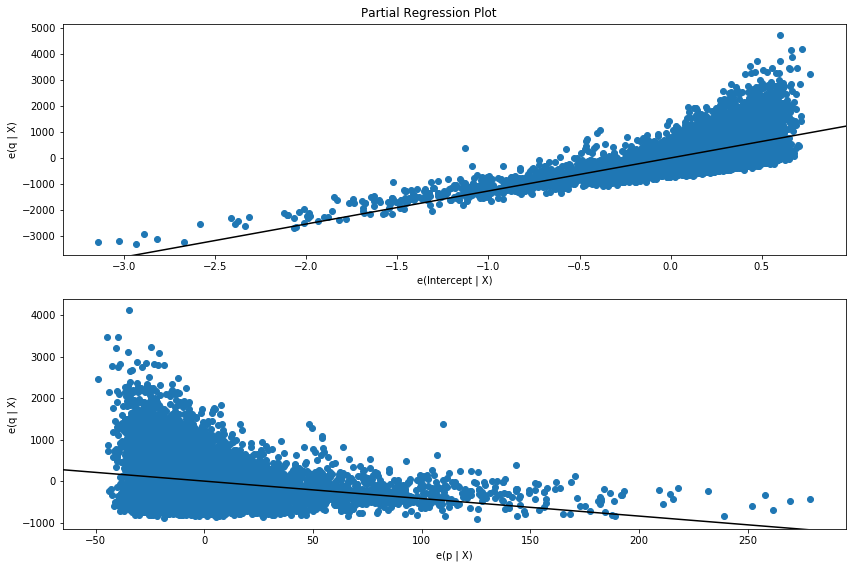

In [266]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(elasticity_model, fig=fig)

#this graph shows some heteroscedasticity. That means that there are other factors
#causing variance in sales quantity besides price

### 10) Elasticity: Is there potential to increase price and increase profitability at the same time?

Since we found above that demand is inelastic, there is potential to increase both price and profitablity at the same time. 